# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [21]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      # WRITE YOUR CODE HERE
      age <- runif(n = sample_size,min = age_lo,max = age_hi)

      x <- beta_xa*age + beta_x0 + rnorm(n = sample_size,sd = sd_x)
        
      c <- beta_ca*age + beta_cx*x + beta_c0 + rnorm(n = sample_size,sd = sd_c)

      return(data.frame(Age = age, Experience = x, Comprehension = c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,Age,Experience,Comprehension
,<dbl>,<dbl>,<dbl>
1,176.77515,110.66224,462.9457
2,99.49661,16.19814,104.8945
3,122.24852,23.96355,119.7668
4,126.18308,36.83363,361.7303
5,172.66248,84.49256,498.9425
6,144.53667,34.15547,219.1725


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [9]:
# WRITE YOUR CODE HERE
require(tidyverse)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula = 'y ~ x'


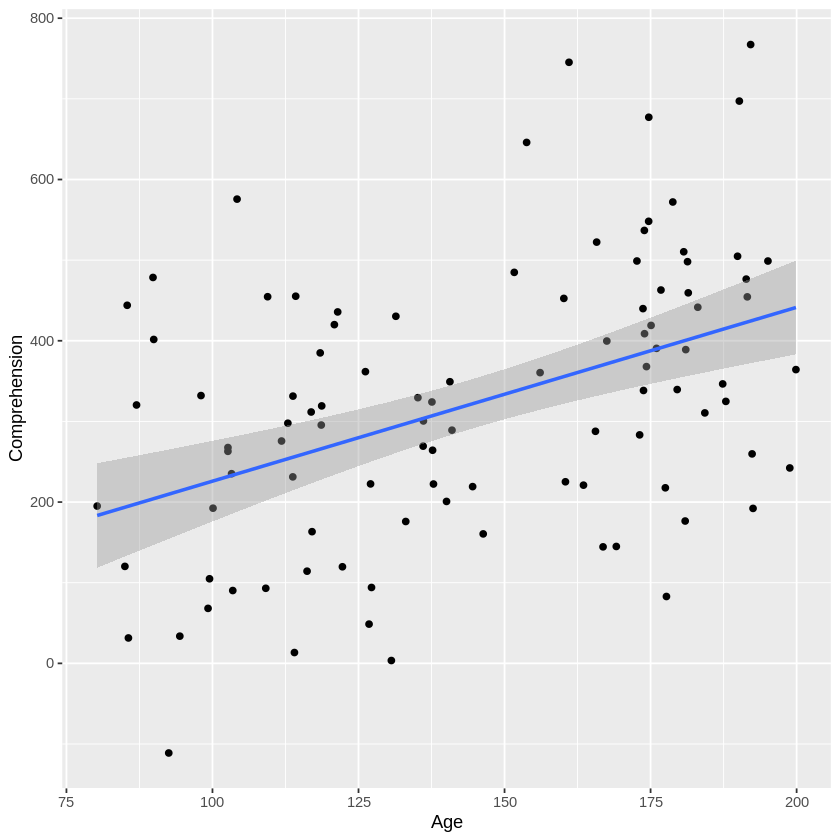

In [23]:
# WRITE YOUR CODE HERE
Plot <- ggplot(dat,aes(x = Age,y = Comprehension)) +
  geom_point() +
  geom_smooth(method="lm")
Plot

b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


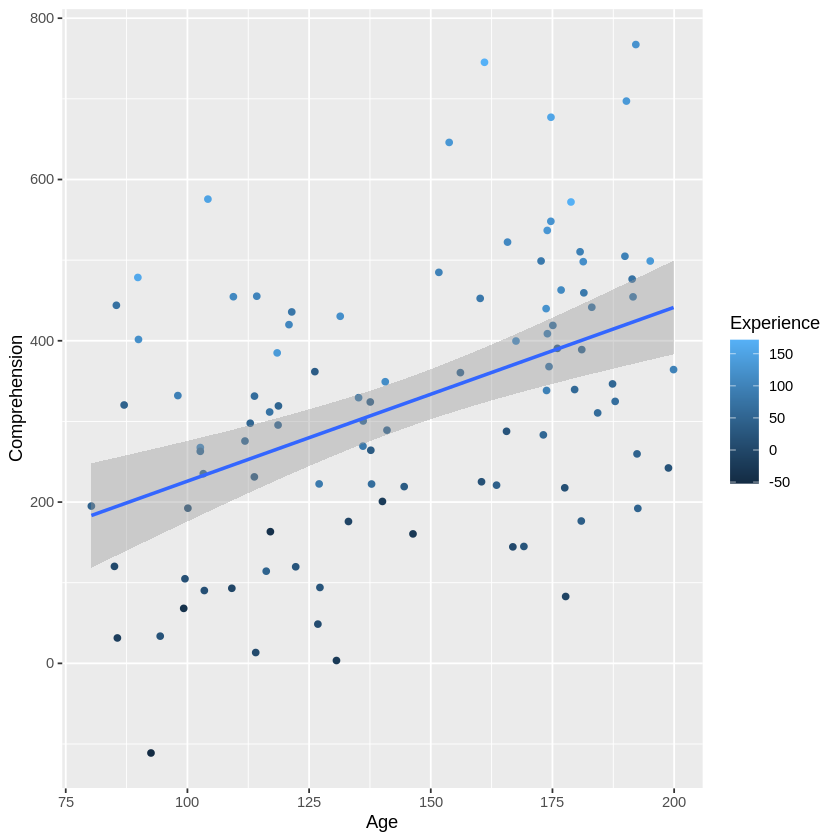

In [24]:
# WRITE YOUR CODE HERE
Plot <- ggplot(dat,aes(x = Age,y = Comprehension, color = Experience)) +
  geom_point() +
  geom_smooth(method="lm")
Plot


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [37]:
# WRITE YOUR CODE HERE
install.packages("mediation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lme4’




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [38]:
# WRITE YOUR CODE HERE
require(mediation)

m1 <- lm(Experience ~ Age, dat)
m2 <- lm(Comprehension ~ Experience + Age, dat)

model <- mediate(m1,m2, treat = "Age", mediator = "Experience")

summary(m1)
summary(m2)
summary(model)

Loading required package: mediation

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0





Call:
lm(formula = Experience ~ Age, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-95.26 -31.41   0.55  32.48 116.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   6.4622    20.6026   0.314  0.75445   
Age           0.3959     0.1388   2.852  0.00529 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.87 on 98 degrees of freedom
Multiple R-squared:  0.07665,	Adjusted R-squared:  0.06723 
F-statistic: 8.135 on 1 and 98 DF,  p-value: 0.005295



Call:
lm(formula = Comprehension ~ Experience + Age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-142.665  -55.775   -4.429   57.127  226.229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.7012    33.7469  -0.228     0.82    
Experience    2.7889     0.1654  16.864  < 2e-16 ***
Age           1.0519     0.2365   4.448 2.31e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.37 on 97 degrees of freedom
Multiple R-squared:  0.7942,	Adjusted R-squared:   0.79 
F-statistic: 187.2 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.103        0.297         1.95   0.006 ** 
ADE               1.041        0.583         1.50  <2e-16 ***
Total Effect      2.145        1.216         3.12  <2e-16 ***
Prop. Mediated    0.514        0.234         0.70   0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?



```
# This is formatted as code
```

> *Write your response here* 
> In our first two models we see significant effects for age and experience, where m1 indicates that as you age you get more reading experience. And in m2 we see that older and more experienced readers have greater comprehension. We see significant effects for mediation (ACME) and moderation (ADE). 
The mediation tells us that if we would see a big change in Comprehension if we varied Experience and held Age constant. The moderation looks at changes in Comprehension when Experience is constant and Age varies. 

**DUE:** 5pm EST, April 3, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*